In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/archive (2).zip")
data.head(20)

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4
5,29,214,148,5
6,0,181,76,6
7,13,156,0,7
8,92,166,0,8
9,184,191,0,9


In [ ]:
print(data.isna().sum(axis = 0))

blue     0
green    0
red      0
label    0
dtype: int64


In [ ]:
features = data[["blue","green","red"]]
target = data.label

In [ ]:
features.head()

,blue,green,red
0,36,27,231
1,36,84,250
2,37,164,255
3,22,205,255
4,38,223,221


In [ ]:
target.head()

0    0
1    1
2    2
3    3
4    4
Name: label, dtype: int64

In [ ]:
features = preprocessing.MinMaxScaler().fit_transform(features)
feature_train, feature_test, target_train, target_test = train_test_split(features,target)

In [ ]:
model = KNeighborsClassifier(n_neighbors=32)
fitModel = model.fit(feature_train, target_train)
predictions = fitModel.predict(feature_test)

In [ ]:
cross_valid_scores = []

for k in range(1, 100):
  knn = KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn,features, target, cv = 10, scoring = 'accuracy')
  cross_valid_scores.append(scores.mean())    

print("Optimal k with cross-validation: \t",np.argmax(cross_valid_scores))
print(confusion_matrix(target_test,predictions))
print(accuracy_score(target_test,predictions))

Optimal k with cross-validation: 	 2
[[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 2 11  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  2  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  1  9  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  8  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  8  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  1  0  8  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  3  1  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  1  7  0  0  1  0]
 [ 1  0  0  0  0  0  0  1  0  0  2  3  7  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  9  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5  2  5]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 11]]
0.7012195121951219


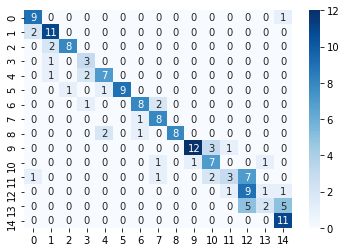

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(target_test,predictions), annot=True, cmap='Blues')

In [ ]:
print(accuracy_score(target_test,predictions))

0.7012195121951219
